In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# read in csv 
df = pd.read_csv("../Resources/race_data.csv")

In [3]:
df.head()

,state,state_code,year,race,hispanic_origin,births_by_race,deaths_by_race,mmr_by_race,population_by_race,id,state_abbv,latitude,longitude
0,Alabama,1,2016,Black or African American,Not Hispanic or Latino,17989,14,77.83,0,US.AL,AL,32.318231,-86.902298
1,Alabama,1,2016,White,Not Hispanic or Latino,35319,18,50.96,0,US.AL,AL,32.318231,-86.902298
2,Alabama,1,2017,Black or African American,Not Hispanic or Latino,18354,25,136.21,704201,US.AL,AL,32.318231,-86.902298
3,Alabama,1,2017,White,Not Hispanic or Latino,34784,15,43.12,1655605,US.AL,AL,32.318231,-86.902298
4,Alabama,1,2018,Black or African American,Not Hispanic or Latino,17939,14,78.04,706754,US.AL,AL,32.318231,-86.902298


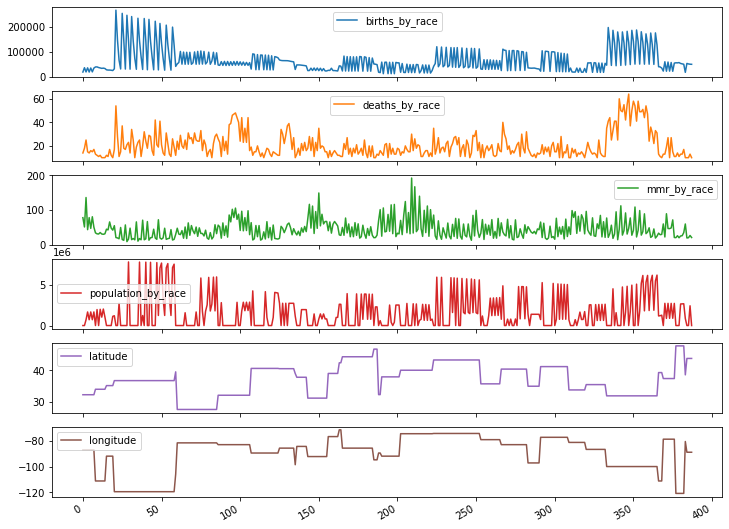

In [7]:
df_plots = df.iloc[:,5:].plot(subplots=True, figsize=(12,10))

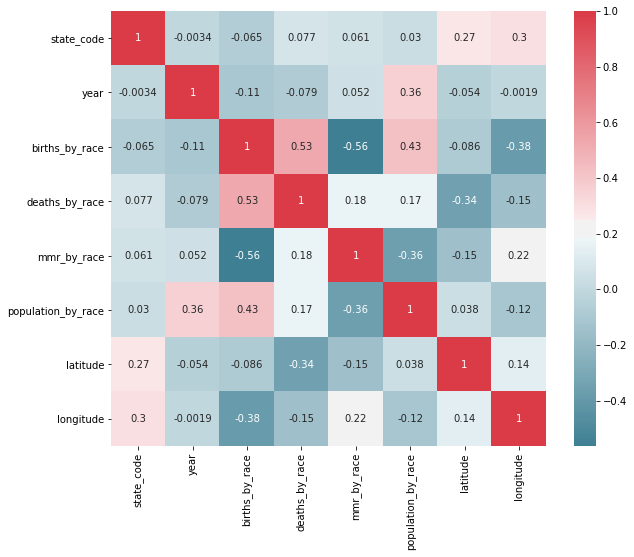

In [26]:
# making the heatmap before encoding leaves out race and ethnicity since they are text fields
fig, ax = plt.subplots(figsize=(10, 8))

#n = df

corr = df.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square=True, annot=True, ax=ax)

In [28]:
# binary encoding with preserving all columns for heatmap
df_binary_encoded = pd.get_dummies(df, columns=["race", "hispanic_origin"])
df_binary_encoded

,state,state_code,year,births_by_race,deaths_by_race,mmr_by_race,population_by_race,id,state_abbv,latitude,longitude,race_Asian or Pacific Islander,race_Black or African American,race_White,hispanic_origin_Hispanic or Latino,hispanic_origin_Not Hispanic or Latino
0,Alabama,1,2016,17989,14,77.83,0,US.AL,AL,32.318231,-86.902298,0,1,0,0,1
1,Alabama,1,2016,35319,18,50.96,0,US.AL,AL,32.318231,-86.902298,0,0,1,0,1
2,Alabama,1,2017,18354,25,136.21,704201,US.AL,AL,32.318231,-86.902298,0,1,0,0,1
3,Alabama,1,2017,34784,15,43.12,1655605,US.AL,AL,32.318231,-86.902298,0,0,1,0,1
4,Alabama,1,2018,17939,14,78.04,706754,US.AL,AL,32.318231,-86.902298,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,West Virginia,54,2018,16785,10,59.58,853052,US.WV,WV,38.597626,-80.454903,0,0,1,0,1
384,Wisconsin,55,2009,52462,10,19.06,0,US.WI,WI,43.784440,-88.787868,0,0,1,0,1
385,Wisconsin,55,2011,50500,10,19.80,0,US.WI,WI,43.784440,-88.787868,0,0,1,0,1
386,Wisconsin,55,2014,49440,13,26.29,2409803,US.WI,WI,43.784440,-88.787868,0,0,1,0,1


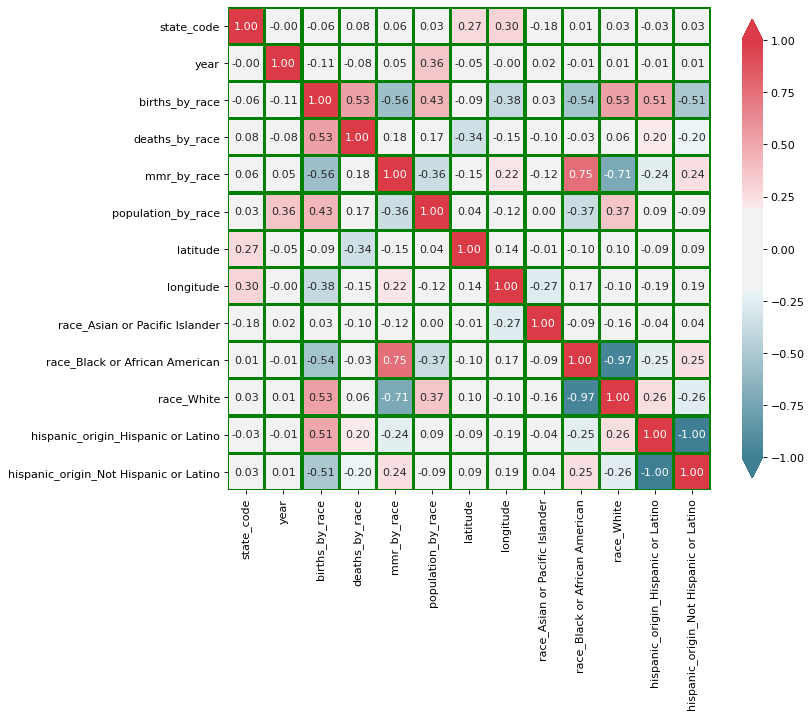

In [32]:
# entire df with binary_encoded data for heatmap
fig, ax = plt.subplots(figsize=(10, 8), dpi=80, facecolor="w", edgecolor="k")

corr = df_binary_encoded.corr()

#setting features
top_corr_features = corr.index
#sns.set_theme(context="paper", style="ticks", font_scale=1.2)

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, sep=50, as_cmap=True),
           square=True, annot=True, ax=ax, fmt=".2f", linewidths=2, linecolor="green", cbar_kws={"shrink": .95, "extend": "both"})

In [4]:
# setting our X and y values 
X = df[["race", "hispanic_origin", "births_by_race"]]
y = df["mmr_by_race"].values.reshape(-1, 1)
print(X.shape, y.shape)

(388, 4) (388, 1)


In [5]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["race", "hispanic_origin"])
data_binary_encoded.head()

,year,births_by_race,race_Asian or Pacific Islander,race_Black or African American,race_White,hispanic_origin_Hispanic or Latino,hispanic_origin_Not Hispanic or Latino
0,2016,17989,0,1,0,0,1
1,2016,35319,0,0,1,0,1
2,2017,18354,0,1,0,0,1
3,2017,34784,0,0,1,0,1
4,2018,17939,0,1,0,0,1


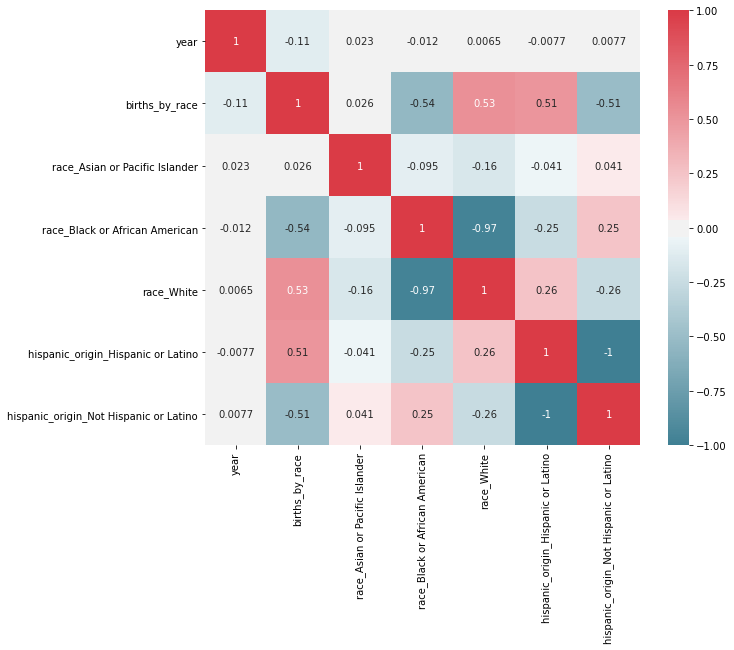

In [27]:
# how to get entire df with binary_encoded data for heatmap?
fig, ax = plt.subplots(figsize=(10, 8))

#n = df

corr = data_binary_encoded.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square=True, annot=True, ax=ax)

In [6]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,year,births_by_race,race_Asian or Pacific Islander,race_Black or African American,race_White,hispanic_origin_Hispanic or Latino,hispanic_origin_Not Hispanic or Latino
145,2013,33583,0,0,1,0,1
7,2019,33892,0,0,1,0,1
19,2018,23968,0,0,1,0,1
262,2018,28857,0,1,0,0,1
367,2015,38473,0,0,1,0,1


In [7]:
# choosing standard scaler because we know our data has outliers
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [8]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

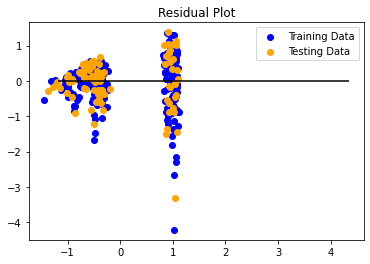

In [12]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

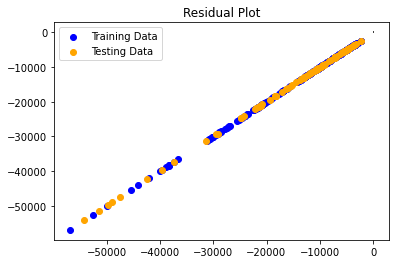

In [25]:
# plot data without scaling 
model_no_scale = LinearRegression()
model_no_scale.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [11]:
# make predictions and display r2 
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.42837017100699054, R2: 0.5865536371928686


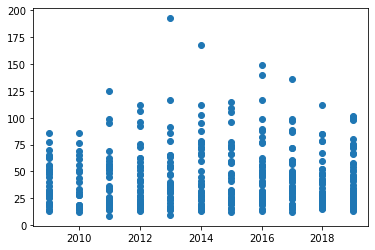

In [24]:
# visualize mmr_by_race across years data was collected
X1 = df["year"].values.reshape(-1,1)
y1 = df["mmr_by_race"].values.reshape(-1,1)
plt.scatter(X1, y1)

In [16]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)

In [17]:
# create the linear regression model
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

LinearRegression()

In [18]:
#make predictiions and display r2

from sklearn.metrics import mean_squared_error

predictions1 = model1.predict(X1_test)
MSE1 = mean_squared_error(y1_test, predictions1)
r2 = model1.score(X1_test, y1_test)

print(f"MSE: {MSE1}, R2: {r2}")

MSE: 820.2420577481126, R2: -0.0019601341876613887


In [20]:
# Make predictions for next 13 years
future_mmr =[]
for i in range(2018, 2031):
    r= model1.predict([[i]])
    future_mmr.append(float(r))
      
    
future_mmr

[46.156336688886825,
 46.362965512411904,
 46.56959433593698,
 46.77622315946206,
 46.98285198298714,
 47.18948080651222,
 47.3961096300373,
 47.60273845356238,
 47.809367277087404,
 48.01599610061248,
 48.22262492413756,
 48.42925374766264,
 48.63588257118772]

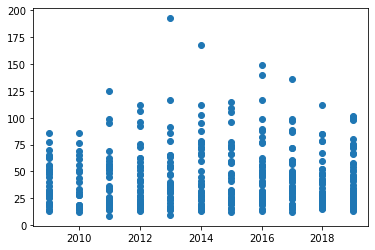

In [22]:
# make predictions for mmr by race and hispanic origin
X2 = df["year"].values.reshape(-1,1)
y2 = df["mmr_by_race"].values.reshape(-1,1)
plt.scatter(X2,y2)